In [1]:
import numpy as np
import sys
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Convolution1D, Convolution2D, MaxPooling2D, MaxPooling1D, ZeroPadding2D, AveragePooling2D, Activation
from keras.layers.normalization import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import np_utils
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from keras import optimizers
import keras.backend as K
from keras.callbacks import LearningRateScheduler, EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
'''import tensorflow as tf
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
sess = tf.Session(config = config)'''

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


'import tensorflow as tf\nconfig = tf.ConfigProto()\nconfig.gpu_options.allow_growth = True\nsess = tf.Session(config = config)'

In [2]:
def load_data_vpn():
    train = pd.read_csv("./train.csv")
    test = pd.read_csv("./test.csv")
    x_train = train.drop(["vpn"], axis=1)
    y_train = train["vpn"]
    x_test = test.drop(["vpn"], axis=1)
    y_test = test["vpn"]
    x_train = x_train.astype('float32')
    x_test = x_test.astype('float32')
    '''y_train = np_utils.to_categorical(y_train, 10)
    y_test = np_utils.to_categorical(y_test, 10)
    x_train /= 255
    x_test /= 255'''
    #print("y_train:",y_train)
    return (x_train, y_train), (x_test, y_test)

In [3]:
def load_data_tor():
    data = pd.read_csv("./tor_non-tor_onlyold.csv")
    x_train = data.drop(["tor"], axis=1)
    y_train = data["tor"]
    data1 = pd.read_csv("./tor_non-tor_onlynew.csv")
    x_test = data1.drop(["tor"], axis=1)
    y_test = data1["tor"]
    #x_train = x_train.iloc[:,[6,52, 40, 53, 8,39,54,12,18,41,62,42,64,5,4,1,36,10,15,37,23,34,20]]
    #x_test = x_test.iloc[:,[6,52, 40, 53, 8,39,54,12,18,41,62,42,64,5,4,1,36,10,15,37,23,34,20]]
    #x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=12345)
    '''x_train = train.drop(["vpn"], axis=1)
    y_train = train["vpn"]
    x_test = test.drop(["vpn"], axis=1)
    y_test = test["vpn"]'''
    x_train = x_train.astype('float32')
    x_test = x_test.astype('float32')
    #print("y_train:",y_train)
    return (x_train, y_train), (x_test, y_test)

In [4]:
def sigmoid(z):
    out = 1 / (1.0 + np.exp(-z))
    return out

def nor(x_train, x_test):
    #mean = np.mean(x_train, axis=0)
    #std = np.std(x_train, axis=0)
    #x_train = (x_train - mean) / std
    #x_test = (x_test - mean) / std
    x_train = np.arctan(x_train)*2 / np.pi
    x_test = np.arctan(x_test)*2 / np.pi
    return x_train, x_test

In [5]:
def show_train_history(train_history, train, validation):  
    plt.plot(train_history.history[train])  
    plt.plot(train_history.history[validation])  
    plt.title('Train History')  
    plt.ylabel(train)  
    plt.xlabel('Epoch')  
    plt.legend(['train', 'validation'], loc='upper left')  
    plt.show()  

In [6]:
def show_train_history_two(train_history1, train_history2, train, validation):  
    plt.plot(train_history1.history[train]+train_history2.history[train])  
    plt.plot(train_history1.history[validation]+train_history2.history[validation])  
    plt.title('Train History')  
    plt.ylabel(train)  
    plt.xlabel('Epoch')  
    plt.legend(['train', 'validation'], loc='upper left')  
    plt.show()  

In [7]:
def show_train_validation_test(train_history1, train_history2, train, validation, test_history1, test_history2):  
    plt.plot(train_history1.history[train]+train_history2.history[train])  
    plt.plot(train_history1.history[validation]+train_history2.history[validation])
    plt.plot(test_history1.history[train]+test_history2.history[train])
    plt.title('Train History')  
    plt.ylabel(train)  
    plt.xlabel('Epoch')  
    plt.legend(['train', 'validation', 'test'], loc='upper left')  
    plt.show()  

In [8]:
def model(x_train, y_train, x_test, y_test):
    model = Sequential()
    #(8, 1)
    #(None, 8)
    dim = len(x_train[0])
    '''model.add(Convolution1D(64, 1, activation = 'relu', input_shape = (77, 1))) 
    model.add(MaxPooling1D(pool_size=1, strides=None, padding='valid')) 
    model.add(BatchNormalization())
    model.add(Dropout(0.3))
    
    model.add(Convolution1D(128, 2, activation = 'relu', input_shape = (77, 1))) 
    model.add(MaxPooling1D(pool_size=1, strides=None, padding='valid'))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))
    
    model.add(Convolution1D(256, 2, activation = 'relu', input_shape = (77, 1)))
    model.add(MaxPooling1D(pool_size=1, strides=None, padding='valid'))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))
    
    model.add(Convolution1D(512, 2, activation = 'relu', input_shape = (77, 1)))
    model.add(MaxPooling1D(pool_size=1, strides=None, padding='valid'))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))
    
    model.add(Flatten())'''
    
    #model.add(BatchNormalization())
    model.add(Dense(input_dim=dim, units=256, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    
    model.add(BatchNormalization())
    model.add(Dense(units=512, activation='relu'))
    #model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(BatchNormalization())
    model.add(Dense(units=1024, activation='relu'))
    #model.add(BatchNormalization())
    model.add(Dropout(0.5))
    for i in range(1):
        model.add(BatchNormalization())
        model.add(Dense(units=2048, activation='relu'))
        #model.add(BatchNormalization())
        model.add(Dropout(0.5))

    model.add(Dense(units=1, activation='sigmoid'))
    #Configuration
    model.summary()
    #opt = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
    opt = optimizers.SGD(lr=0.01)
    #opt = optimizers.SGD(lr=0.01)
    #model.compile(loss = "mean_squared_error", optimizer = opt, metrics=['accuracy'])
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    #scheduler = LearningRateScheduler(scheduler)
    callbacks = []
    callbacks.append(EarlyStopping(monitor='loss', patience=32, verbose=1, min_delta=1e-3, mode='auto'))
    train_history1 = model.fit(x_train, y_train, validation_split=0.2, batch_size=256, epochs=256, verbose=2, callbacks = callbacks)
    #test_history1 = model.fit(x_test, y_test, batch_size=256, epochs=2, verbose=1, callbacks = callbacks)
    #print(type(test_history1.history))
    #print(test_history1.history)
    #print(type(train_history1.history))
    #print(train_history1.history)
    print("Now change the optimizer to SGD")
    model.compile(loss = "mean_squared_error", optimizer = opt, metrics=['accuracy'])
    train_history2 = model.fit(x_train, y_train, validation_split=0.2, batch_size=256, epochs=256, verbose=2)
    #test_history2 = model.fit(x_test, y_test, batch_size=256, epochs=5, verbose=1)
    
    result = model.evaluate(x_train, y_train, batch_size=10000)
    print("train accuracy:", result[1])
    result = model.evaluate(x_test, y_test, batch_size=10000)
    print("test accuracy:", result[1])
    
    return train_history1,train_history2


    
(x_train, y_train), (x_test, y_test) = load_data_tor()
#x_train, x_test = nor(x_train, x_test)
x_train = np.array(x_train,dtype=np.long)
x_test = np.array(x_test,dtype=np.long)
x_train = preprocessing.scale(x_train)
x_test = preprocessing.scale(x_test)
#print(x_train.shape)

#x_train = np.expand_dims(x_train, axis=2) # for convolution

#print(x_train.shape)
#x_test = np.expand_dims(x_test, axis=2) # for convolution

#min_max_scaler = preprocessing.MinMaxScaler()
#X_train_minmax = min_max_scaler.fit_transform(x_train.as_matrix())
#X_test_minmax = min_max_scaler.fit_transform(x_test)
#scaler = StandardScaler()
#x_test = scaler.fit(x_test)
train_history1,train_history2 = model(x_train, y_train, x_test, y_test)


/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py:2850: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):
/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/data.py:164: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               19968     
_________________________________________________________________
batch_normalization_1 (Batch (None, 256)               1024      
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
dense_2 (Dense)              (None, 512)               131584    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 512)               2048      
__________

Epoch 76/256
 - 25s - loss: 0.0447 - acc: 0.9882 - val_loss: 0.0460 - val_acc: 0.9878
Epoch 77/256
 - 25s - loss: 0.0449 - acc: 0.9882 - val_loss: 0.0450 - val_acc: 0.9898
Epoch 78/256
 - 23s - loss: 0.0449 - acc: 0.9882 - val_loss: 0.0456 - val_acc: 0.9898
Epoch 79/256
 - 30s - loss: 0.0442 - acc: 0.9887 - val_loss: 0.0435 - val_acc: 0.9896
Epoch 80/256
 - 22s - loss: 0.0452 - acc: 0.9883 - val_loss: 0.0439 - val_acc: 0.9900
Epoch 81/256
 - 23s - loss: 0.0455 - acc: 0.9880 - val_loss: 0.0465 - val_acc: 0.9898
Epoch 82/256
 - 25s - loss: 0.0450 - acc: 0.9882 - val_loss: 0.0454 - val_acc: 0.9895
Epoch 83/256
 - 24s - loss: 0.0442 - acc: 0.9883 - val_loss: 0.0461 - val_acc: 0.9894
Epoch 84/256
 - 20s - loss: 0.0463 - acc: 0.9875 - val_loss: 0.0429 - val_acc: 0.9893
Epoch 85/256
 - 25s - loss: 0.0454 - acc: 0.9882 - val_loss: 0.0432 - val_acc: 0.9898
Epoch 86/256
 - 22s - loss: 0.0441 - acc: 0.9885 - val_loss: 0.0440 - val_acc: 0.9902
Epoch 87/256
 - 30s - loss: 0.0443 - acc: 0.9891 - val

Epoch 48/256
 - 21s - loss: 0.0091 - acc: 0.9898 - val_loss: 0.0091 - val_acc: 0.9899
Epoch 49/256
 - 21s - loss: 0.0092 - acc: 0.9899 - val_loss: 0.0090 - val_acc: 0.9900
Epoch 50/256
 - 17s - loss: 0.0092 - acc: 0.9896 - val_loss: 0.0090 - val_acc: 0.9901
Epoch 51/256
 - 19s - loss: 0.0091 - acc: 0.9899 - val_loss: 0.0090 - val_acc: 0.9901
Epoch 52/256
 - 22s - loss: 0.0092 - acc: 0.9895 - val_loss: 0.0090 - val_acc: 0.9901
Epoch 53/256
 - 19s - loss: 0.0089 - acc: 0.9898 - val_loss: 0.0090 - val_acc: 0.9902
Epoch 54/256
 - 18s - loss: 0.0090 - acc: 0.9899 - val_loss: 0.0090 - val_acc: 0.9901
Epoch 55/256
 - 19s - loss: 0.0093 - acc: 0.9893 - val_loss: 0.0090 - val_acc: 0.9902
Epoch 56/256
 - 16s - loss: 0.0092 - acc: 0.9897 - val_loss: 0.0090 - val_acc: 0.9902
Epoch 57/256
 - 17s - loss: 0.0090 - acc: 0.9901 - val_loss: 0.0090 - val_acc: 0.9902
Epoch 58/256
 - 22s - loss: 0.0091 - acc: 0.9898 - val_loss: 0.0090 - val_acc: 0.9902
Epoch 59/256
 - 18s - loss: 0.0092 - acc: 0.9896 - val

Epoch 143/256
 - 16s - loss: 0.0090 - acc: 0.9899 - val_loss: 0.0090 - val_acc: 0.9902
Epoch 144/256
 - 16s - loss: 0.0089 - acc: 0.9902 - val_loss: 0.0089 - val_acc: 0.9902
Epoch 145/256
 - 13s - loss: 0.0089 - acc: 0.9899 - val_loss: 0.0089 - val_acc: 0.9902
Epoch 146/256
 - 14s - loss: 0.0089 - acc: 0.9902 - val_loss: 0.0090 - val_acc: 0.9901
Epoch 147/256
 - 13s - loss: 0.0089 - acc: 0.9900 - val_loss: 0.0090 - val_acc: 0.9901
Epoch 148/256
 - 13s - loss: 0.0089 - acc: 0.9899 - val_loss: 0.0090 - val_acc: 0.9900
Epoch 149/256
 - 12s - loss: 0.0091 - acc: 0.9898 - val_loss: 0.0090 - val_acc: 0.9900
Epoch 150/256
 - 16s - loss: 0.0089 - acc: 0.9901 - val_loss: 0.0090 - val_acc: 0.9900
Epoch 151/256
 - 13s - loss: 0.0088 - acc: 0.9901 - val_loss: 0.0090 - val_acc: 0.9902
Epoch 152/256
 - 13s - loss: 0.0090 - acc: 0.9898 - val_loss: 0.0090 - val_acc: 0.9902
Epoch 153/256
 - 12s - loss: 0.0091 - acc: 0.9897 - val_loss: 0.0090 - val_acc: 0.9902
Epoch 154/256
 - 14s - loss: 0.0088 - acc: 

Epoch 238/256
 - 14s - loss: 0.0088 - acc: 0.9900 - val_loss: 0.0089 - val_acc: 0.9902
Epoch 239/256
 - 13s - loss: 0.0089 - acc: 0.9900 - val_loss: 0.0089 - val_acc: 0.9902
Epoch 240/256
 - 13s - loss: 0.0089 - acc: 0.9903 - val_loss: 0.0089 - val_acc: 0.9902
Epoch 241/256
 - 12s - loss: 0.0090 - acc: 0.9899 - val_loss: 0.0089 - val_acc: 0.9902
Epoch 242/256
 - 12s - loss: 0.0088 - acc: 0.9905 - val_loss: 0.0090 - val_acc: 0.9902
Epoch 243/256
 - 12s - loss: 0.0089 - acc: 0.9901 - val_loss: 0.0090 - val_acc: 0.9900
Epoch 244/256
 - 13s - loss: 0.0089 - acc: 0.9900 - val_loss: 0.0090 - val_acc: 0.9900
Epoch 245/256
 - 14s - loss: 0.0088 - acc: 0.9901 - val_loss: 0.0089 - val_acc: 0.9902
Epoch 246/256
 - 14s - loss: 0.0092 - acc: 0.9896 - val_loss: 0.0089 - val_acc: 0.9902
Epoch 247/256
 - 13s - loss: 0.0087 - acc: 0.9901 - val_loss: 0.0090 - val_acc: 0.9901
Epoch 248/256
 - 13s - loss: 0.0090 - acc: 0.9900 - val_loss: 0.0090 - val_acc: 0.9902
Epoch 249/256
 - 14s - loss: 0.0090 - acc: 

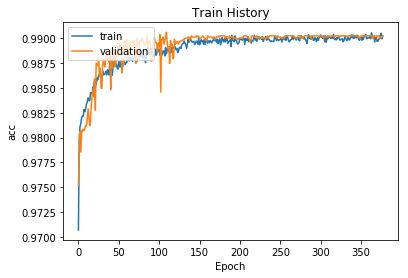

In [9]:
show_train_history_two(train_history1, train_history2, 'acc', 'val_acc')  

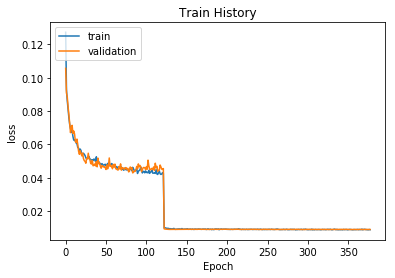

In [10]:
show_train_history_two(train_history1, train_history2, 'loss', 'val_loss')  